In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('C:/Users/hyein/Desktop/대외활동/공빅/프로젝트/data/회귀분석데이터.csv',encoding='cp949')
df.head()

,Unnamed: 0,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,거주인구비율,새벽생활인구수,새벽생활인구비율,아침생활인구수,아침생활인구비율,낮생활인구수,낮생활인구비율,저녁생활인구수,저녁생활인구비율,밤생활인구수,밤생활인구비율,총노인시설수
0,0,11110530,1101053,종로구 사직동,종로구,사직동,1834,0.1869,875.871010,0.062638,1104.030338,0.056340,1437.354717,0.042984,1144.439123,0.043179,922.204253,0.055171,0.0
1,1,11110540,1101054,종로구 삼청동,종로구,삼청동,641,0.2287,298.850208,0.067799,319.414392,0.062408,358.021219,0.047104,279.701400,0.049052,269.756844,0.063469,2.0
2,2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.1751,1035.308758,0.066652,1028.421995,0.066545,925.150619,0.064248,975.857941,0.067552,1048.022034,0.067686,1.0
3,3,11110560,1101056,종로구 평창동,종로구,평창동,3407,0.1843,1379.958999,0.068910,1439.653999,0.070474,1406.473729,0.073161,1373.420901,0.073164,1403.274736,0.070446,6.0
4,4,11110570,1101057,종로구 무악동,종로구,무악동,1380,0.1638,530.941077,0.061926,509.564156,0.062644,420.146286,0.067539,437.282214,0.069775,500.027435,0.064150,2.0


In [3]:
df.columns

Index(['Unnamed: 0', '행정동코드', '읍면동코드', '자치행정동', '자치구', '행정동', '거주인구수',
       '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율', '낮생활인구수',
       '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율', '총노인시설수'],
      dtype='object')

In [4]:
df = df[['행정동','거주인구수',
       '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율', '낮생활인구수',
       '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율','총노인시설수']]
df

,행정동,거주인구수,거주인구비율,새벽생활인구수,새벽생활인구비율,아침생활인구수,아침생활인구비율,낮생활인구수,낮생활인구비율,저녁생활인구수,저녁생활인구비율,밤생활인구수,밤생활인구비율,총노인시설수
0,사직동,1834,0.1869,875.871010,0.062638,1104.030338,0.056340,1437.354717,0.042984,1144.439123,0.043179,922.204253,0.055171,0.0
1,삼청동,641,0.2287,298.850208,0.067799,319.414392,0.062408,358.021219,0.047104,279.701400,0.049052,269.756844,0.063469,2.0
2,부암동,1763,0.1751,1035.308758,0.066652,1028.421995,0.066545,925.150619,0.064248,975.857941,0.067552,1048.022034,0.067686,1.0
3,평창동,3407,0.1843,1379.958999,0.068910,1439.653999,0.070474,1406.473729,0.073161,1373.420901,0.073164,1403.274736,0.070446,6.0
4,무악동,1380,0.1638,530.941077,0.061926,509.564156,0.062644,420.146286,0.067539,437.282214,0.069775,500.027435,0.064150,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,둔촌1동,33,0.2260,489.478381,0.063336,509.554456,0.061594,438.769044,0.063380,457.306129,0.066394,499.129470,0.064804,8.0
421,둔촌2동,4059,0.1604,2123.791262,0.075939,2135.398101,0.076596,2217.838017,0.085714,2012.025920,0.080185,2078.687295,0.076568,6.0
422,암사1동,5913,0.1678,2094.836172,0.064174,1874.885853,0.062986,1586.072839,0.065827,1778.881731,0.067771,1952.247980,0.064586,9.0
423,천호2동,5922,0.1715,2889.359990,0.065186,2925.192033,0.065987,3064.630074,0.069275,3222.604813,0.066729,3090.112452,0.065970,15.0


In [5]:
df.columns

Index(['행정동', '거주인구수', '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율',
       '낮생활인구수', '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율',
       '총노인시설수'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
행정동         425 non-null object
거주인구수       425 non-null int64
거주인구비율      425 non-null float64
새벽생활인구수     425 non-null float64
새벽생활인구비율    425 non-null float64
아침생활인구수     425 non-null float64
아침생활인구비율    425 non-null float64
낮생활인구수      425 non-null float64
낮생활인구비율     425 non-null float64
저녁생활인구수     425 non-null float64
저녁생활인구비율    425 non-null float64
밤생활인구수      425 non-null float64
밤생활인구비율     425 non-null float64
총노인시설수      424 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 46.6+ KB


In [7]:
#print(df[df['총노인시설수'].isnull()]['행정동'])
#print('\n')
#print(df[df['거주인구수'].isnull()]['행정동'])

In [8]:
# null값 처리

df = df.fillna(0)

# 2. 변수 선택

## 1) 단계적 변수 선택법

In [9]:
## 전진 단계별 선택법
variables = ['거주인구수', '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율',
       '낮생활인구수', '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율'] ## 설명 변수 리스트

y = df['총노인시설수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

C:\Users\hyein\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
selected_variables

['거주인구수', '낮생활인구비율']

In [11]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

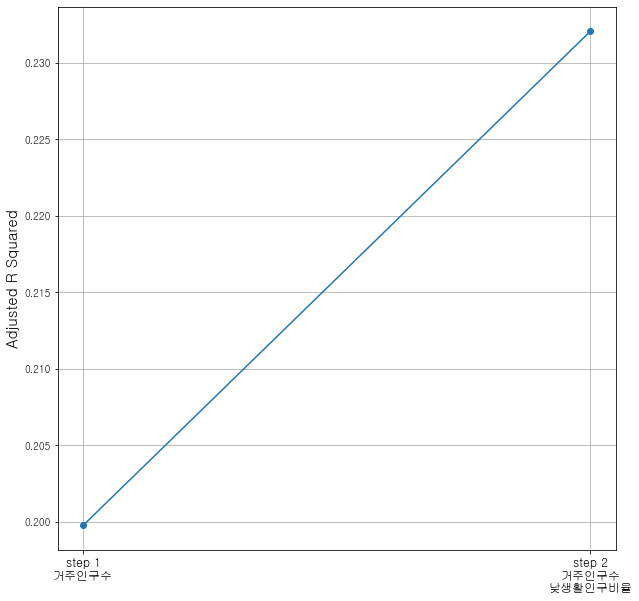

In [12]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 2) 전진 선택법

In [13]:
## 전진 선택법
variables = ['거주인구수', '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율',
       '낮생활인구수', '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율'] ## 설명 변수 리스트

y = df['총노인시설수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [14]:

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [15]:
selected_variables

['거주인구수', '낮생활인구비율']

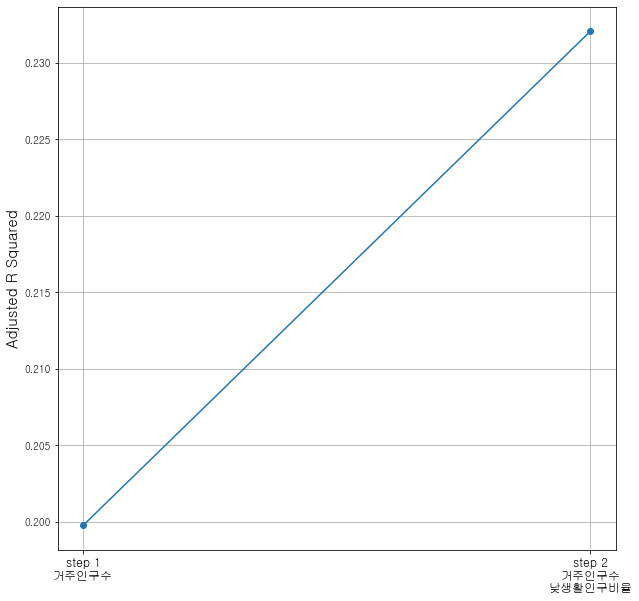

In [16]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

## 3) 후진소거법

In [17]:
## 후진 소거법
variables = ['거주인구수', '거주인구비율', '새벽생활인구수', '새벽생활인구비율', '아침생활인구수', '아침생활인구비율',
       '낮생활인구수', '낮생활인구비율', '저녁생활인구수', '저녁생활인구비율', '밤생활인구수', '밤생활인구비율'] ## 설명 변수 리스트

y = df['총노인시설수'] ## 반응 변수
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [18]:

while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [19]:
selected_variables

['거주인구수', '거주인구비율', '새벽생활인구수', '아침생활인구수']

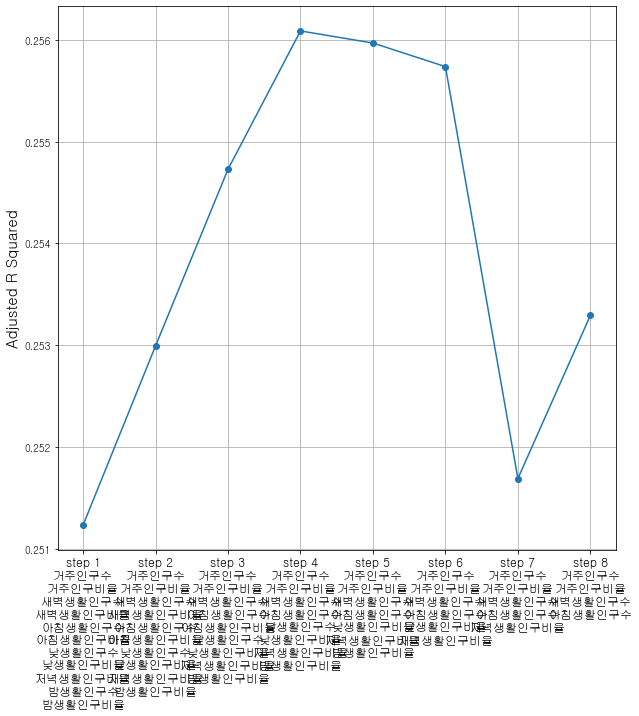

In [20]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# 3. 다중회귀 분석

## 1) 3D 시각화
참고사이트 : https://lovelydiary.tistory.com/346

In [21]:
x_data = df[['거주인구수', '낮생활인구비율']]
#x_data = sm.add_constant(x_data)
target = df[['총노인시설수']]

multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 총노인시설수   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              661.3
Date:                Tue, 17 Aug 2021   Prob (F-statistic):                   6.37e-131
Time:                        13:41:26   Log-Likelihood:                         -1253.5
No. Observations:                 425   AIC:                                      2511.
Df Residuals:                     423   BIC:                                      2519.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
거주인구수          0.0019      0.000     12.304      0.000       0.002       0.002
낮생활인구비율        7.4620     10.271      0.727      0.468     -12.727      27.651
==============================================================================
Omnibus:                      102.379   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.756
Skew:                           1.182   Prob(JB):                     1.07e-56
Kurtosis:                       5.994   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
dff = df[['거주인구수', '낮생활인구비율','총노인시설수']]

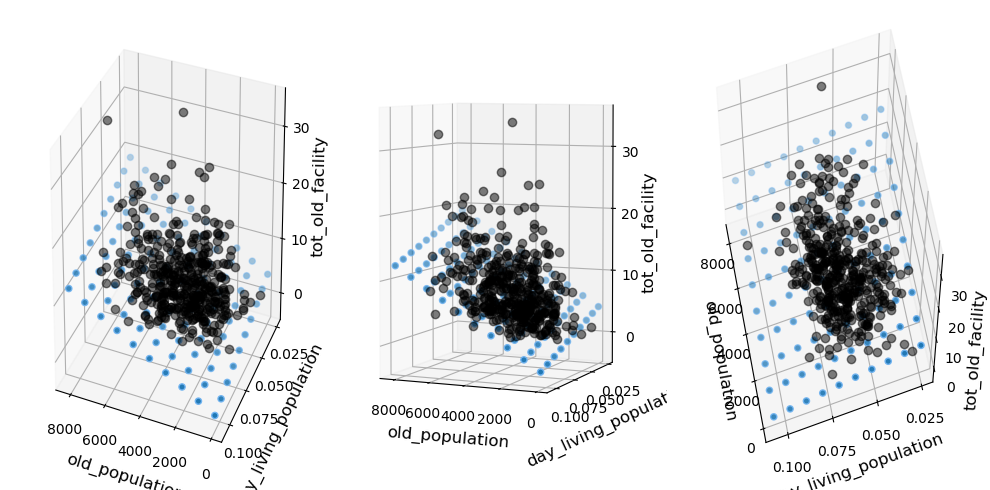

In [39]:
X = df[['거주인구수', '낮생활인구비율']].values.reshape(-1,2)  
Y = df['총노인시설수']
 
# 시각화를 위한 데이터 준비
 
x = X[:, 0] #Horsepower 열 값만 array로 가져옴
y = X[:, 1] #MPG.city 열 값만 array로 가져옴
z = Y
 
#각 독립변수들의 range 지정: 데이터 중 최소값, 최대값, 그 구간을 10으로 설정
x_pred = np.linspace(df['거주인구수'].min(), df['거주인구수'].max(), 10)
y_pred = np.linspace(df['낮생활인구비율'].min(), df['낮생활인구비율'].max(), 10)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
 
#sklearn의 linear_model.LinearRegression()함수로 다중선형회귀식을 만들고,
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
 
#위에서 만든 model_viz 값을 넣어 다중선형회귀식의 예측값을 얻음
predicted = model.predict(model_viz)
 
# 해당 다중선형회귀식의 결정계수 R^2을 구함: 회귀식의 실제 데이터에 대한 설명력을 확인
 
r2 = model.score(X, Y)
 
#다중선형회귀 그래프 그리기
 
plt.style.use('default')
 
fig = plt.figure(figsize=(10, 5))
 
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
 
axes = [ax1, ax2, ax3]
 
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5) #검은색 마커들
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=20, edgecolor='#70b3f0') #파란색 마커들
    ax.set_xlabel('old_population', fontsize=12) #해당 축을 설명하는 라벨
    ax.set_ylabel('day_living_population', fontsize=12)
    ax.set_zlabel('tot_old_facility', fontsize=12)
    ax.locator_params(nbins=6, axis='x') #해당 축의 구간 개수 (쪼개진 구간도 포함)
    ax.locator_params(nbins=4, axis='y')
    ax.locator_params(nbins=4, axis='z')
 

# 높이와 방위각을 조절해서 보고 싶은 위치를 조정할 수 있음
# elevation (높이), azimuth (방위각)
ax1.view_init(elev=27, azim=112) 
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)
 
#fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
 
fig.tight_layout()


## 2) 2D 시각화
참고사이트 : https://m.blog.naver.com/tjdrud1323/221720259834

In [24]:
dff.describe()

,거주인구수,낮생활인구비율,총노인시설수
count,425.000000,425.000000,425.000000
mean,3688.985882,0.059977,7.880000
std,1472.275373,0.012429,5.103384
min,33.000000,0.024678,0.000000
25%,2684.000000,0.051635,4.000000
50%,3516.000000,0.060902,7.000000
75%,4519.000000,0.068478,11.000000
max,8267.000000,0.106263,34.000000


데이터 스케일링 필요 

In [25]:
x = df[['거주인구수', '낮생활인구비율']].values
y = df[['총노인시설수']]

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x = StandardScaler().fit_transform(x)
features=['거주인구수', '낮생활인구비율']
pd.DataFrame(x,columns=features)

,거주인구수,낮생활인구비율
0,-1.261430,-1.368856
1,-2.072695,-1.036962
2,-1.309711,0.344091
3,-0.191756,1.062023
4,-1.570159,0.609140
...,...,...
420,-2.486148,0.274120
421,0.251617,2.073270
422,1.512377,0.471222
423,1.518497,0.748977


### PCA 실행

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1'])

In [29]:
principalDf.head()

,principal component1
0,-1.859893
1,-2.198860
2,-0.682797
3,0.615371
4,-0.679543


In [30]:
principalDf['행정동']=df['행정동']
principalDf['총노인시설']=df['총노인시설수']
principalDf

,principal component1,행정동,총노인시설
0,-1.859893,사직동,0.0
1,-2.198860,삼청동,2.0
2,-0.682797,부암동,1.0
3,0.615371,평창동,6.0
4,-0.679543,무악동,2.0
...,...,...,...
420,-1.564140,둔촌1동,8.0
421,1.643944,둔촌2동,6.0
422,1.402616,암사1동,9.0
423,1.603346,천호2동,15.0


In [31]:
principalDf.columns=['pca_x', '행정동', '총노인시설']

In [32]:
x = principalDf['pca_x']
y = principalDf['총노인시설']

In [33]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

LinearRegression()

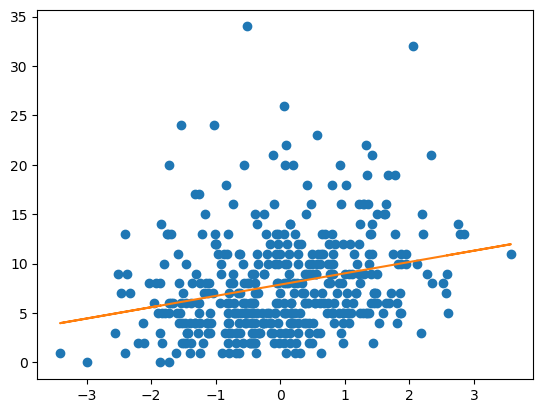

In [34]:
plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

### 회귀식에서 멀리 떨어진 동 찾기

회귀식에서 아래쪽으로 멀리 떨어진 동 = 노인인구수, 낮생활인구비율에 비해 노인시설이 적은 것을 뜻함

In [35]:
ff = pd.DataFrame(line_fitter.predict(x.values.reshape(-1,1))-y)
ff['행정동']=df['행정동']
ff

,총노인시설,행정동
0,5.752153,사직동
1,3.364351,삼청동
2,6.098833,부암동
3,2.584028,평창동
4,5.102555,무악동
...,...,...
420,-1.909486,둔촌1동
421,3.760786,둔촌2동
422,0.484691,암사1동
423,-5.285660,천호2동


In [36]:
f1 = ff[ff['총노인시설']>0]
f1

,총노인시설,행정동
0,5.752153,사직동
1,3.364351,삼청동
2,6.098833,부암동
3,2.584028,평창동
4,5.102555,무악동
...,...,...
418,5.952444,성내2동
419,7.139208,성내3동
421,3.760786,둔촌2동
422,0.484691,암사1동


In [37]:
f1.describe()

,총노인시설
count,248.000000
mean,3.197438
std,1.805405
min,0.010105
25%,1.958894
50%,3.192082
75%,4.398058
max,7.602842


In [38]:
f2 = f1[f1['총노인시설']>6]['행정동'].tolist()
print('최종 후보 동 : {}'.format(f2))

최종 후보 동 : ['부암동', '중곡3동', '전농1동', '망우3동', '돈암1동', '장위2동', '역촌동', '홍제3동', '서림동', '반포본동', '일원1동', '오륜동', '잠실7동', '성내3동']
